# How to solve systems of linear equation?

## General case $Ax=b$

We need to solve the system of equations $Ax=b$. There are certain things that can happen.
    * A is squared and has a full rank  (very good matrix)
    * A is squared and doesn't have full rank. (Underdetermined???)
    * A is overdetermined. We have more equations than unknowns, or simpler more columns than rows.
    
**Question**:
    What is the relation between the singular values/vectors and the solution of the system of linear equations?
    Answer: aparantly the singular/eigenvector that corresponds to the smallest singular/eigenvalue is an approximate solution for Ax=0, for A being underdetermined.


### Case 1: A is squared and has full rank. 

Best possible scenario. Has a unique solution.
Use Gaussian elimination or $x=A^{-1}b$.

For large matrices the inversion or elimination may not be efficient then use LU decomposition, etc. If matrices have some further cool properties look at Cholesky decomposition...

In [2]:
import numpy as np
from numpy import linalg as LA

In [3]:
## solve the system exactly
print("Direct solution")
A = np.matrix([[2,1], [3,1]])
b = np.array([2,3])
print("matrix\n", A)
## solves the system by Gaussian elimination
x_dir = np.linalg.solve(A,b)
print("Solution solve", x_dir)

Direct solution
matrix
 [[2 1]
 [3 1]]
Solution solve [1. 0.]


### Case 2: A is underdetermined
Since at least one variable is unconstraint, in general there exists an infinite amount of solutions. But wikipedia says that there are other possiblities. Not interested in this for now.

### Case 3: A is overdetermined.

There are cases for which a unique solution exists, based on the linear independence of the rows.
See https://en.wikipedia.org/wiki/Overdetermined_system#Non-homogeneous_case

In general, if we are interested in an approximate solution (probably when no unique one exists), here is where we can use the method called "ordinary least squares". Then to find the closest approximate solution, we look into the problem $\mathrm{min}_x ||Ax-b||$. And someone has derived that 

$x = (A^TA)^{-1}A^Tb$


In [4]:
## checking if ordinary least squares gives the same solution as Gaussian elimination for simple matrix
x_ls = (LA.inv(A.transpose()*A)*A.transpose()).dot(b)
print("Matrix A size", A.shape)
print("Gaussian elimination:", x_dir)
print("Least squares solution:", x_ls)

Matrix A size (2, 2)
Gaussian elimination: [1. 0.]
Least squares solution: [[ 1.00000000e+00 -1.77635684e-15]]


Seems like least squares solution is pretty close to a real one for this case :)

But A is a squared matrix. Btw, the coeffient of the matrix A are observed points taken from $y=kx+b$, where (x,y) points are (2,2) and (3,3). Let's make  A an overdetermined matrix B by adding another point (4,4). This should anyway work since 3 points describe the same line.

In [5]:
B =  np.matrix([[2,1], [3,1], [4,1]])
c =  np.array([2,3,4])
x3_ls = (LA.inv(B.transpose()*B)*B.transpose()).dot(c)
# x3_dir = np.linalg.solve(B,c)  ---> This doesn't work, since matrix is not squared any more
print("Matrix B is", B.shape)
print("Least squares solution:", x3_ls)

Matrix B is (3, 2)
Least squares solution: [[ 1.00000000e+00 -1.77635684e-15]]


Let's add some noise to the matrices and check if the least squares solution is close to the previous one for the overdetermined system.

In [6]:
c_noisy = np.array([2.1, 3.2, 3.9])
x3_ls_noisy = (LA.inv(B.transpose()*B)*B.transpose()).dot(c_noisy)
print("Matrix B is", B.shape)
print("Least squares solution:", x3_ls_noisy)

Matrix B is (3, 2)
Least squares solution: [[0.9        0.36666667]]


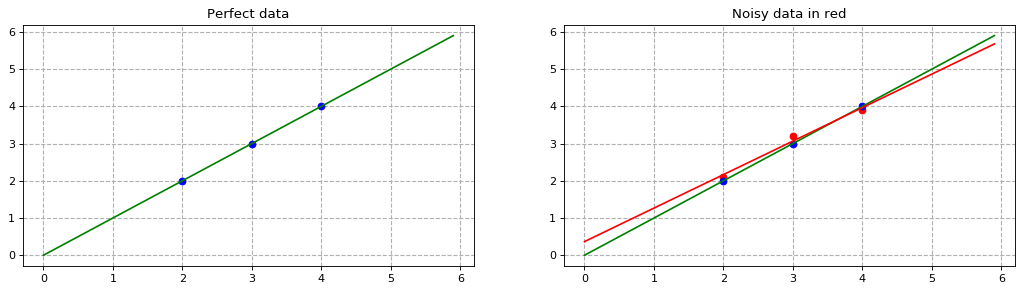

In [8]:
import matplotlib.pyplot as plt
## Visualization of the least squares solution
fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(B[:,0], c, 'bo');
line = np.arange(0, 6, 0.1)

f = x3_ls[0,0] * line + x3_ls[0,1]
plt.plot(line, f, 'g-')

plt.grid(linestyle='--', linewidth=1);
plt.title("Perfect data");

plt.subplot(122)
plt.plot(B[:,0], c_noisy, 'ro');
plt.plot(B[:,0], c, 'bo');

plt.plot(line, f, 'g-')
f = x3_ls_noisy[0,0] * line +  x3_ls_noisy[0,1]
plt.plot(line, f, 'r-')

plt.grid(linestyle='--', linewidth=1);
plt.title("Noisy data in red");

## Solving homogeneous systems $Ax=0$


It seems like all the thoughts further only imply for the case of **underdetermined** A.
We will look here to the case where A is $m x n$ matrix, where m < n (??). Any vector x that satisfies the $Ax=0$ is called to belong in the "null space" of A. A magical space where only those vectors live, which A turns into 0 :)  The simplest vector is zero vector, however "somehow" we are not interested in that.

So we are interested to find some vector x from a null-space that is not a zero vector.

**Claim (someone's)**  The solution x is the eigenvector corresponding to the only zero eigenvalue of AtA.

Proof (not mine): For some reason to prove this, we urgently want to minimize $||Ax||^2$ instead of Ax=0. If we believe this, everything else comes naturally.

$||Ax||^2$ = opening norm = $(Ax)^TAx = x^TA^TAx$ subject to a constraint $x^Tx = 1$

Using cool trick with Lagrange multipliers, we "put" the constraint into the minimization function.

$L(x) = x^TA^TAx - \lambda(x^Tx-1)$

Now searching for minimum of L(x) by taking the derivative over x and set it to 0.
$A^TAx - \lambda x =0$

By inspecting the last expression, we can see that it suspiciously looks like eigenvectors definition $Av = \lambda v$, only A here is $A^TA$. Since the eigenvalues are non-negative values, the only way to minimize L(x) is eigenvalue to be 0 (or closest to 0)? This basically should prove that the non-boring (non-zero) solution to the $Ax=0$ is the eigenvector that corresponds to the zero eigenvalue of $A^TA$


There is a relation between singular and eigenvalues, so $Ax=0$ can also be solved with SVD, by decomposing the matrix $A$ and not $A^TA$


In [9]:
## Let's look t the example if this magic actually works
A = np.matrix([[-1,1,2,4], [2,0,1,-7]])
print("Having matrix of size ", A.shape, "\n", A)
print("With rank", LA.matrix_rank(A))

Having matrix of size  (2, 4) 
 [[-1  1  2  4]
 [ 2  0  1 -7]]
With rank 2


In [10]:
## let's find eigenvalues
w, v = np.linalg.eig(A.transpose()*A)
print("Right eigenvectors\n", v)
print("Eigenvalues", w)

Right eigenvectors
 [[-0.26627157 -0.05793858  0.79460159 -0.87165686]
 [ 0.0598853  -0.36066205 -0.52908598 -0.38942313]
 [ 0.01657747 -0.93062443  0.16161113  0.19986771]
 [ 0.96189313  0.02245401  0.25011633 -0.22049229]]
Eigenvalues [ 7.02490310e+01  5.75096901e+00  5.64956686e-16 -7.60227229e-16]


In [11]:
print("Check if true. Should equal to zero vector", A*v[:,-1])

Check if true. Should equal to zero vector [[ 2.22044605e-16]
 [-6.66133815e-16]]
